# **Credit Card Fraud Detection**

**Student Name:** Shreya Sutar

**Project Title:** Credit Card Fraud Detection

# Project Overview

This project focuses on detecting fraudulent credit card transactions using Machine Learning techniques. Since fraud cases represent a very small portion of the dataset, the problem involves handling highly imbalanced data. The workflow includes Exploratory Data Analysis (EDA), data preprocessing, imbalance handling using SMOTE, and building a Logistic Regression model. The model is evaluated using Precision, Recall, F1-score, and ROC-AUC to ensure effective fraud detection while minimizing false negatives.

# 1. Business Understanding 
Credit card fraud is a major challenge for banks and financial institutions. Fraudulent transactions lead to:

*Huge financial losses for banks

*Loss of customer trust

*Increased operational costs for fraud investigation

*Damage to brand reputation

According to global reports, billions of dollars are lost every year due to card fraud.

The bank needs an automated intelligent system that can detect fraudulent transactions in real-time before the transaction is approved.

# 2. Data Understanding

**Import Libraries:**

Data manipulation: pandas, numpy

Visualization: matplotlib, seaborn

Machine learning: sklearn (Logistic Regression, preprocessing, metrics)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE


In [2]:
#Loading the dataset
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#getting more data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.shape

(284807, 31)

In [6]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
#checking distribution of Class variable
df['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

# 3. Data Preparation

In [9]:
# checking missing values
df.isnull().sum()
#OR--> df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
#checking for duplicates
df.duplicated().any()

np.True_

In [11]:
#dropping the duplicate values from the dataset
df=df.drop_duplicates()

In [12]:
#checking again whether duplicate values were clear or not
df.duplicated().any()

np.False_

In [13]:
# Again checking the size of data
df.shape

(283726, 31)

# 4. Data Preprocessing

In [14]:
# Dividing the data into categorial and numerical columns
cate_val=[]
cont_val=[]

for column in df.columns:
    if df[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [15]:
# checking contents of categorial column
cate_val

['Class']

In [16]:
# checking contents of numerical column
cont_val

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [17]:
#Feature Scaling
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
scaler = StandardScaler()
df[['Time', 'Amount']] = scaler.fit_transform(df[['Time', 'Amount']])


In [19]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [20]:
#splitting the dataset into Training set and Test set


In [21]:
#Creating Independent variables
X = df.drop('Class', axis=1)
y = df['Class']


In [22]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.642235,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252
284803,1.642257,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325
284804,1.642278,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239
284805,1.642278,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391


In [23]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [25]:
#Checking the training data of X
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
226238,1.047534,2.238954,-1.724499,-2.151484,-2.577803,0.993668,3.565492,-1.785957,0.860122,-1.264003,...,-0.323810,-0.149574,-0.049333,0.278442,0.684735,-0.219028,-0.159167,0.037920,-0.049932,-0.225531
134253,-0.296857,-1.315062,1.630783,0.597001,-0.038359,-0.404580,-0.965712,0.212249,0.735381,-1.267926,...,-0.067580,-0.238898,-0.946773,0.323904,0.515632,-0.713000,-0.266503,-0.017794,0.051058,-0.325411
186465,0.680376,1.908801,0.021184,-2.087997,0.129310,1.161468,0.605244,-0.022371,0.180296,0.283819,...,-0.210474,0.293609,1.095842,-0.044874,-1.689517,0.106098,0.007758,0.045164,-0.053068,-0.293622
149493,-0.073062,1.811257,0.316556,0.316751,3.880231,0.048454,1.020163,-0.734868,0.233651,0.681423,...,-0.228032,0.138869,0.700422,0.174064,0.702997,-0.212523,-0.010018,-0.017740,-0.038006,-0.284237
18461,-1.375058,1.358817,-1.120881,0.550266,-1.547659,-1.194950,0.275448,-1.201843,0.212889,-2.094285,...,-0.361686,-0.340972,-0.636442,0.252758,-0.344160,-0.064282,-0.439622,0.062524,0.013095,-0.257480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225116,1.038351,-0.098309,-0.382823,0.202726,-0.732301,0.336342,-0.253872,0.837947,-0.402611,-1.424484,...,0.028820,0.154790,1.009327,0.002124,-0.462865,-0.422526,0.010597,0.041090,-0.004501,0.141883
3525,-1.933366,-1.708940,-1.296255,1.953170,-2.277028,-0.510388,0.408807,0.329231,0.477331,1.058119,...,0.557379,0.466843,0.860939,0.361317,-0.264732,0.423478,0.065689,-0.026392,0.077562,0.692205
242674,1.195909,-0.875424,1.159992,0.573970,1.178888,-0.206267,0.260623,0.371124,0.443532,-0.011588,...,-0.353885,-0.100597,-0.157726,0.049751,-0.014156,-0.513855,-0.771982,-0.242970,0.094879,-0.205563
60594,-0.956511,1.247036,0.348595,0.589407,0.982998,-0.222000,-0.452687,-0.012336,-0.140168,0.052173,...,-0.042753,-0.211495,-0.556038,0.037106,-0.133330,0.403622,-0.595756,0.043911,0.032002,-0.333359


In [26]:
#Checking training data of y
y_train

226238    0
134253    0
186465    0
149493    0
18461     0
         ..
225116    0
3525      0
242674    0
60594     0
67057     0
Name: Class, Length: 226980, dtype: int64

In [27]:
#Checking testing data of X
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
86568,-0.705990,1.228821,-0.063408,0.274145,0.647465,-0.048135,0.372073,-0.224231,0.079939,0.640759,...,-0.096566,-0.129554,-0.083779,-0.151661,-0.700372,0.598550,0.491409,0.002989,0.001782,-0.307400
251557,1.275941,-0.203154,1.176678,-0.759595,-0.518472,0.629649,-0.721675,0.638893,0.243377,-0.157488,...,-0.098429,0.384629,1.206754,-0.082753,0.508386,-0.710906,-0.234510,0.379640,0.261351,-0.345579
20232,-1.346436,-1.672836,1.401297,1.503940,2.175491,0.699791,1.062139,1.114364,-0.535822,-0.252983,...,0.828472,-0.525950,-0.408743,-0.280083,-0.846468,-0.155456,-0.062383,0.007777,0.113900,0.011211
68952,-0.876311,0.819379,-1.124913,0.515025,0.513945,-1.009048,0.488484,-0.580672,0.187686,-0.999142,...,-0.110144,-0.057205,-0.168061,-0.198732,-0.337408,0.238538,-0.289454,0.038214,0.058407,0.557220
191852,0.729091,2.009701,0.105635,-1.752759,0.588312,0.374801,-0.637884,0.009260,-0.129487,0.492619,...,-0.135479,0.008970,0.357394,-0.013472,-0.446920,0.111522,0.642944,-0.036998,-0.043404,-0.347696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56516,-0.997180,-1.162452,0.795672,1.953356,1.654216,1.069023,-0.183501,0.093182,0.377642,-1.362161,...,0.023948,0.258460,0.502164,-0.121908,0.094908,-0.078996,-0.084585,0.093070,0.146178,-0.345340
188431,0.698447,-2.023289,2.214345,-2.097511,-1.041892,-0.120896,-0.027650,-0.595211,1.820963,-0.391636,...,0.014967,-0.202295,-0.810599,0.165183,-0.360040,-0.103692,0.173059,0.060668,-0.003436,-0.313431
115561,-0.440157,1.180651,-0.199219,1.233565,0.869184,-1.138767,-0.315881,-0.660840,0.103571,1.011595,...,-0.134275,-0.097776,-0.114066,0.037897,0.419476,0.236291,0.318145,0.013352,0.026229,-0.316825
187644,0.691054,2.061059,0.136698,-1.830805,0.206364,0.705093,-0.326154,0.107304,-0.093259,0.184680,...,-0.102156,-0.332798,-0.861005,0.274903,0.113347,-0.219966,0.176290,-0.063574,-0.043578,-0.349773


In [28]:
#Checking the testing data of y
y_test

86568     0
251557    0
20232     0
68952     0
191852    0
         ..
56516     0
188431    0
115561    0
187644    0
8267      0
Name: Class, Length: 56746, dtype: int64

# 5. EDA- Exploratory Data Analysis

In [29]:
#finding count of class in dataset
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

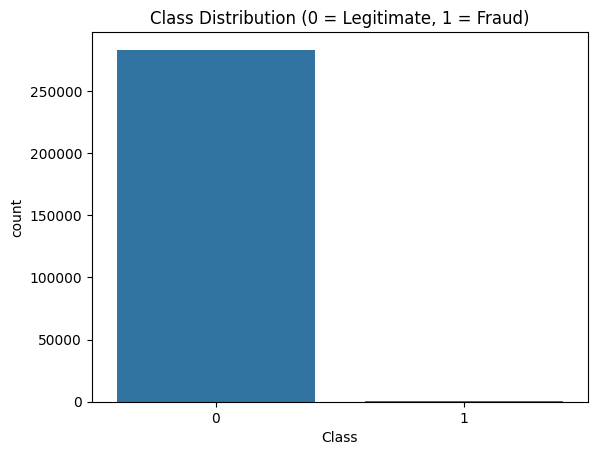

In [30]:
#ploting the class variable
# Example: Distribution of class variable
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Legitimate, 1 = Fraud)")
plt.show()


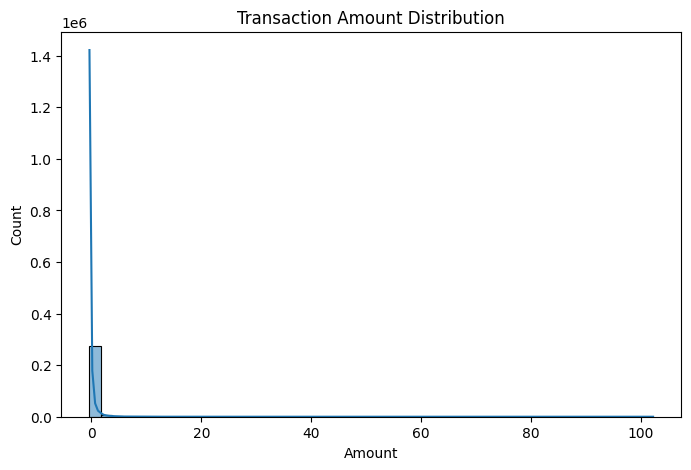

In [31]:
#Transaction Amount Distribution
#Example: Histogram of Amount variable
plt.figure(figsize=(8,5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()


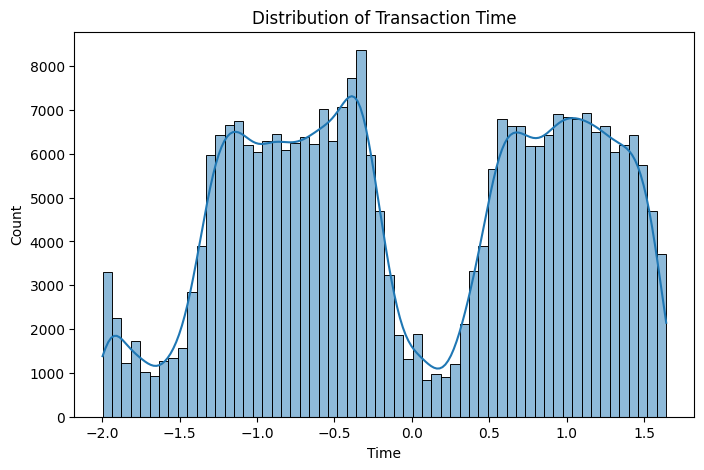

In [32]:
#Transaction time Distribution
#Example: Histogram of time variable
plt.figure(figsize=(8,5))
sns.histplot(df['Time'], bins=60, kde=True)
plt.title('Distribution of Transaction Time')
plt.show()

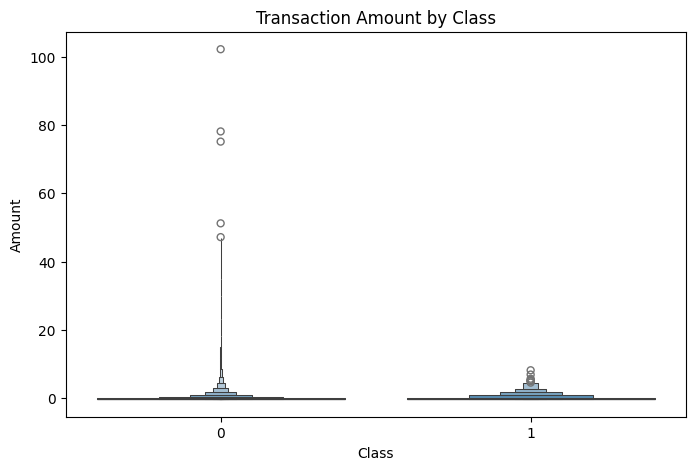

In [33]:
#Amount vs Class (Fraud vs Legit)
plt.figure(figsize=(8,5))
sns.boxenplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.show()

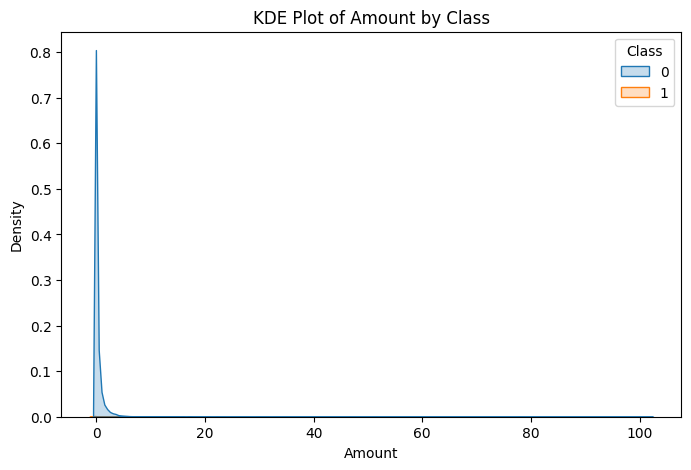

In [34]:
#KDE Plot for Amount by Class
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='Amount', hue='Class', fill=True)
plt.title('KDE Plot of Amount by Class')
plt.show()

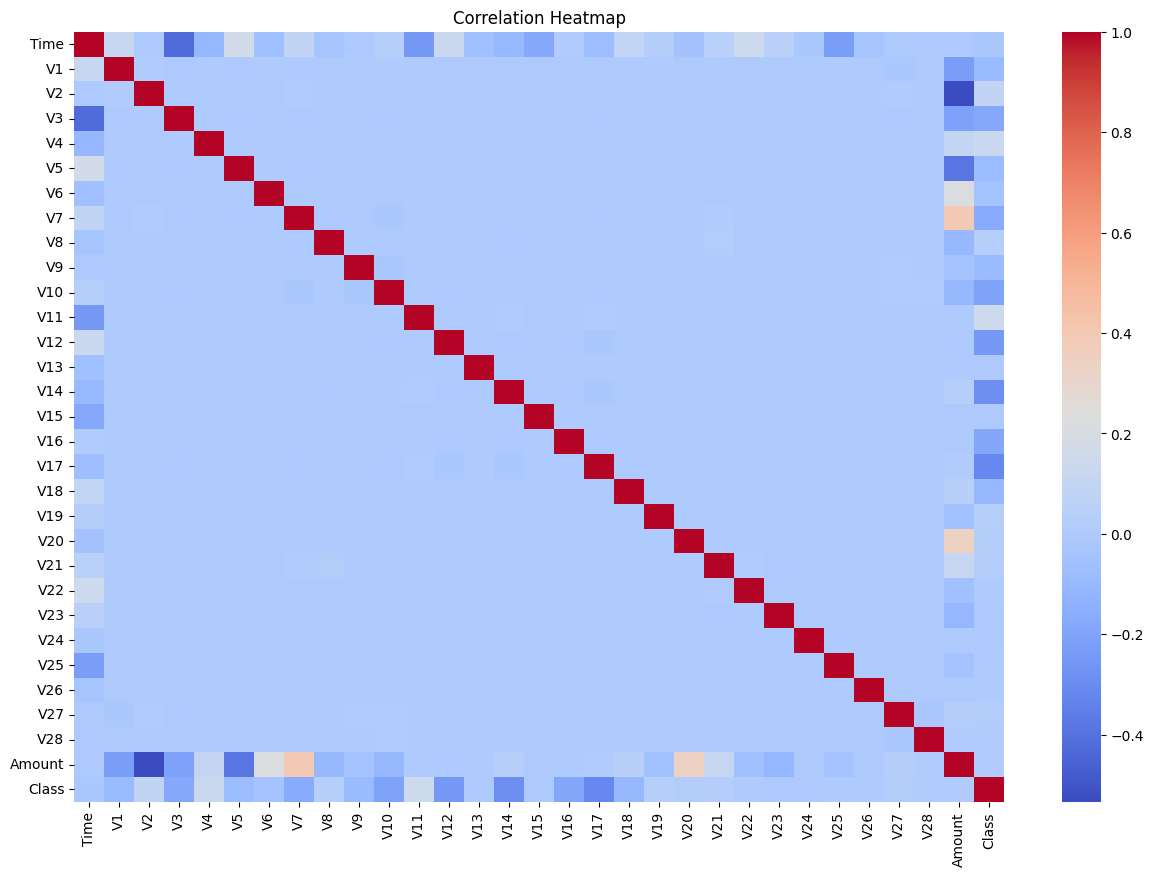

In [35]:
#drawing the correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [36]:
#Top Correlated Features with Target
corr = df.corr()['Class'].abs().sort_values(ascending=False)
print(corr.head(10))

Class    1.000000
V17      0.313498
V14      0.293375
V12      0.250711
V10      0.206971
V16      0.187186
V3       0.182322
V7       0.172347
V11      0.149067
V4       0.129326
Name: Class, dtype: float64


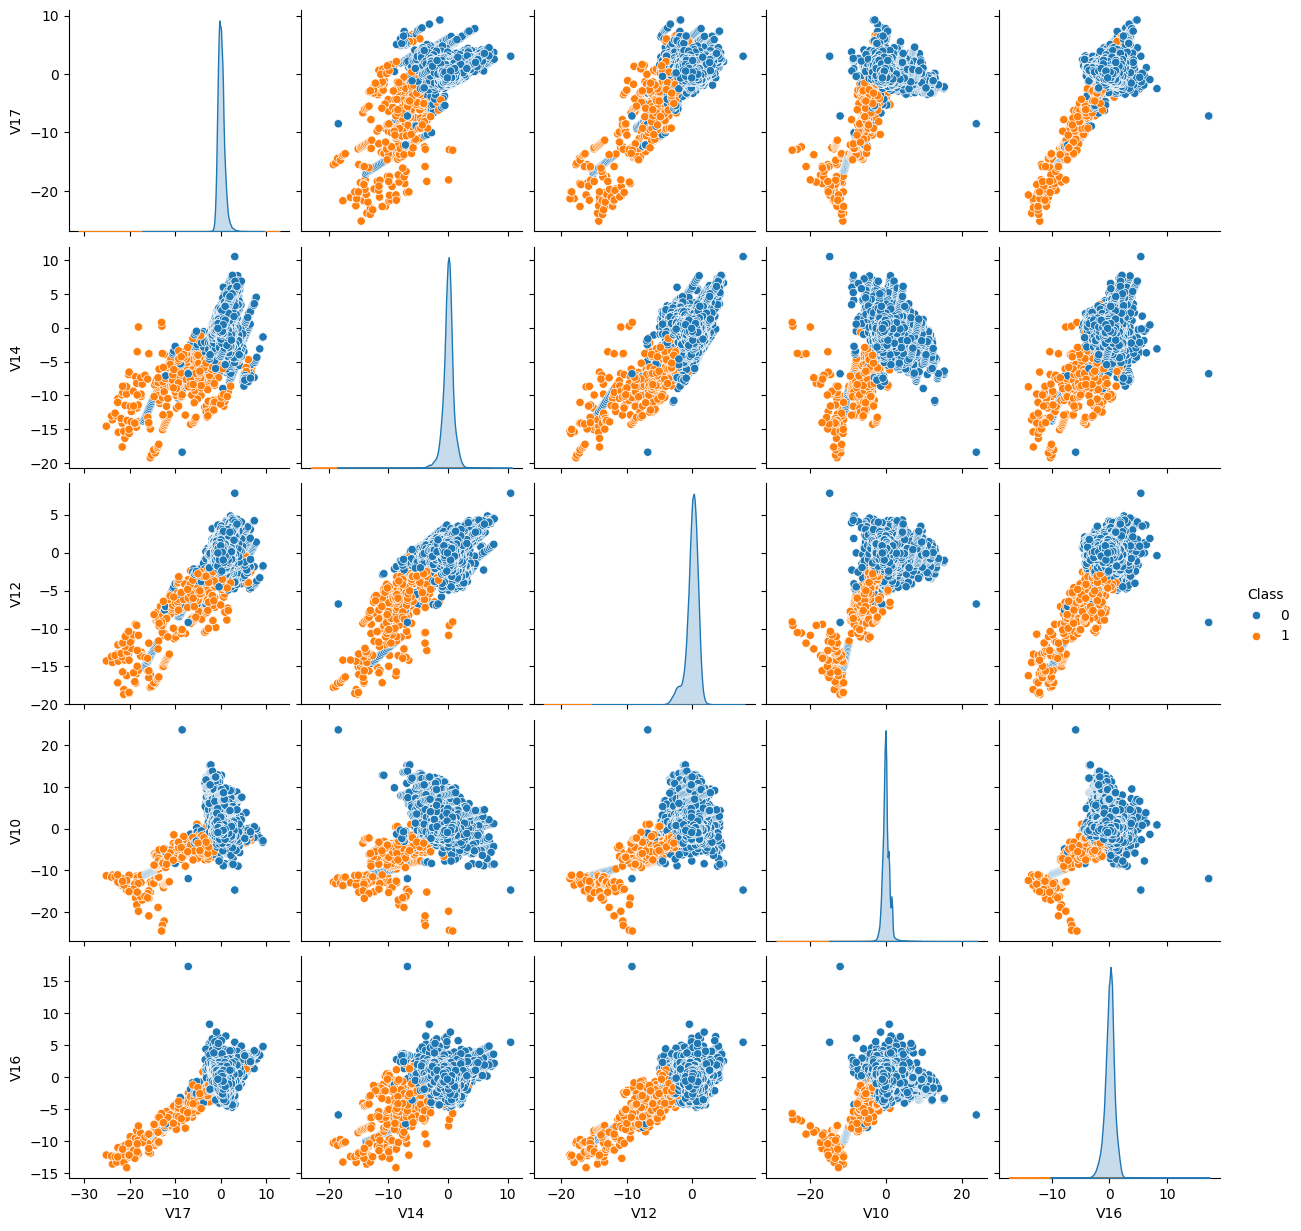

In [37]:
#Pairplot of Important Features
important_features = corr.head(6).index.tolist()
sns.pairplot(df[important_features], hue='Class')
plt.show()

# 6. Model Building- Logistic Regression

In [38]:
#Handling Imbalanced Data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())


Before SMOTE: Class
0    226602
1       378
Name: count, dtype: int64
After SMOTE: Class
0    226602
1    226602
Name: count, dtype: int64


In [39]:
#Model Building--> Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)


LogisticRegression(max_iter=1000)

# 7. Model Evaluation

In [40]:
#Predictions
y_pred = model.predict(X_test)


In [41]:
#Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.87      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.92      0.54     56746
weighted avg       1.00      0.97      0.99     56746



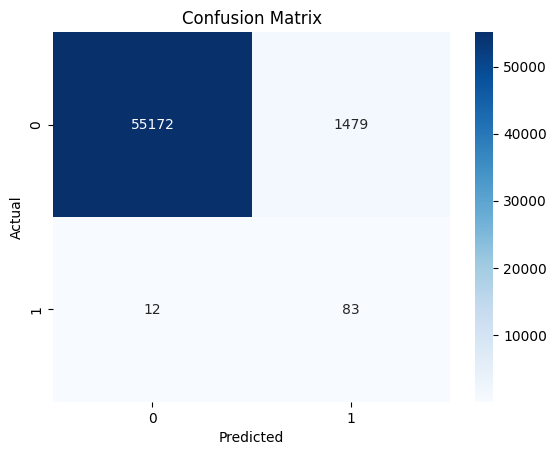

In [42]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [43]:
#ROC-AUC curve
y_prob = model.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, y_prob)

print("ROC-AUC Score:", roc_score)


ROC-AUC Score: 0.9618504434817429


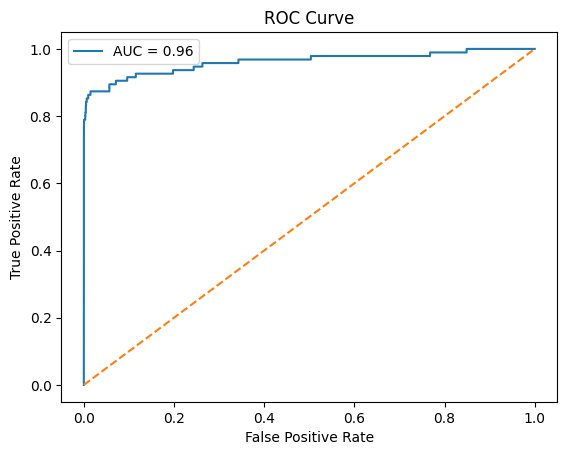

In [44]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_score:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# 8. Observations

*Dataset is highly imbalanced (~0.17% fraud cases)

*Accuracy is not a good metric for this problem

*SMOTE significantly improves recall

*Logistic Regression performs well with proper preprocessing

# 9. Save the Model

In [45]:
import pickle

with open("model.pkl", "wb") as file:
    pickle.dump(model, file)


# 10. Conclusions

This project built an end-to-end machine learning pipeline to detect fraudulent credit card transactions from a highly imbalanced dataset. Through EDA, preprocessing, feature scaling, and SMOTE-based resampling, the Logistic Regression model achieved strong performance measured using Precision, Recall, F1-score, and ROC-AUC rather than accuracy. The model effectively identifies fraud cases while minimizing false negatives, demonstrating a practical real-world fraud detection solution.